<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numerical-Optimization" data-toc-modified-id="Numerical-Optimization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numerical Optimization</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions-For-Plotting/Animating" data-toc-modified-id="Helper-Functions-For-Plotting/Animating-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Helper Functions For Plotting/Animating</a></span></li><li><span><a href="#Defining-Objective-Function-(3-Poles)" data-toc-modified-id="Defining-Objective-Function-(3-Poles)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Defining Objective Function (3-Poles)</a></span></li><li><span><a href="#Gradient-Descent-with-Fixed-Step-Size" data-toc-modified-id="Gradient-Descent-with-Fixed-Step-Size-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Gradient Descent with Fixed Step Size</a></span></li><li><span><a href="#Gradient-Descent-with-Line-Search" data-toc-modified-id="Gradient-Descent-with-Line-Search-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gradient Descent with Line Search</a></span></li><li><span><a href="#Gradient-Descent-using-Conjugate-Gradients" data-toc-modified-id="Gradient-Descent-using-Conjugate-Gradients-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Gradient Descent using Conjugate Gradients</a></span></li><li><span><a href="#Gradient-Descent-Using-Newton's-Method" data-toc-modified-id="Gradient-Descent-Using-Newton's-Method-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Gradient Descent Using Newton's Method</a></span><ul class="toc-item"><li><span><a href="#Finding-Hessian-with-Sympy" data-toc-modified-id="Finding-Hessian-with-Sympy-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Finding Hessian with Sympy</a></span></li><li><span><a href="#Algorithm" data-toc-modified-id="Algorithm-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Algorithm</a></span></li></ul></li><li><span><a href="#Defining-Objective-Function-(Convex)" data-toc-modified-id="Defining-Objective-Function-(Convex)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Defining Objective Function (Convex)</a></span></li><li><span><a href="#Solutions-for-the-Convex-Function-using-Previously-Mentioned-Methods" data-toc-modified-id="Solutions-for-the-Convex-Function-using-Previously-Mentioned-Methods-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Solutions for the Convex Function using Previously Mentioned Methods</a></span><ul class="toc-item"><li><span><a href="#GD-with-Fixed-Step-Size" data-toc-modified-id="GD-with-Fixed-Step-Size-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>GD with Fixed Step Size</a></span></li><li><span><a href="#GD-with-Line-Search" data-toc-modified-id="GD-with-Line-Search-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>GD with Line Search</a></span></li><li><span><a href="#GD-using-Conjugate-Gradients" data-toc-modified-id="GD-using-Conjugate-Gradients-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>GD using Conjugate Gradients</a></span></li></ul></li><li><span><a href="#Gradient-Descent-with-Momentum" data-toc-modified-id="Gradient-Descent-with-Momentum-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Gradient Descent with Momentum</a></span></li><li><span><a href="#Gradient-Descent-with-Nesterov-Momentum" data-toc-modified-id="Gradient-Descent-with-Nesterov-Momentum-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Gradient Descent with Nesterov Momentum</a></span></li><li><span><a href="#Gradient-Descent-Adam" data-toc-modified-id="Gradient-Descent-Adam-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Gradient Descent Adam</a></span></li></ul></li></ul></div>

# Numerical Optimization

In [1]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)

%matplotlib nbagg
plt.interactive(False)

Numpy version: 1.19.2
Matplotlib version: 3.3.4


## Helper Functions For Plotting/Animating

In [2]:
def plot_f(f, ax=None, optimum_point=None):
    if ax is None:
        ax = plt.gca()
    x1, x2 = np.mgrid[-1.5:3:.01, -1.5:2:.01]
    X = np.dstack((x1, x2))
    Z = f(X)
    ax.contour(x1, x2, Z, levels=32)
    if optimum_point is not None:
        ax.plot(optimum_point[0], optimum_point[1], "*y")


def plot_history(history, linestyle="-k", pointstyle=".r"):
    history = np.array(history)
    p1 = plt.plot(history[:, 0], history[:, 1], linestyle)
    p2 = plt.plot(history[:, 0], history[:, 1], pointstyle)
    return p1, p2


def animate_optimization(f, history, linestyle="-k", pointstyle=".r", title=None, optimum_point=None):
    history_np = np.array(history)
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    xdata, ydata = [], []
    p1, = plt.plot([], [], linestyle, alpha=0.5)
    p2, = plt.plot([], [], pointstyle)

    if title is not None:
        ax.set_title(title)

    def init():
        return p1, p2,

    def update(frame):
        history_np_until_frame = history_np[:frame+1, :]
        p1.set_data(history_np_until_frame[:, 0], history_np_until_frame[:, 1])
        p2.set_data(history_np_until_frame[:, 0], history_np_until_frame[:, 1])
        return p1, p2,

    plot_f(f, optimum_point=optimum_point)
    ani = FuncAnimation(fig, update, frames=len(history_np),
                        init_func=init, blit=True)

    plt.close()

    # return ani.to_jshtml()
    return ani.to_html5_video()


_ = plt.close()

## Defining Objective Function (3-Poles)

<ipython-input-3-fbe7a63e2cc3>:7: RuntimeWarning: divide by zero encountered in log
  cum += np.log(np.linalg.norm(x-xi_, axis=-1)**2)


<IPython.core.display.Javascript object>


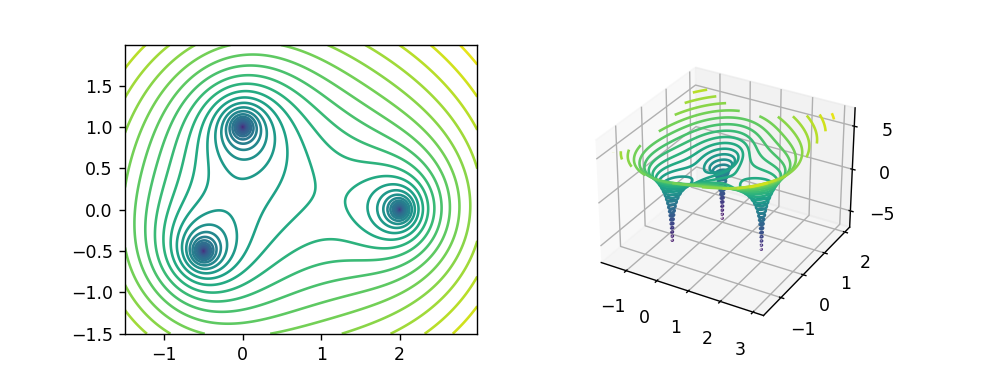

In [3]:
default_poles = np.array([[2, 0], [0, 1], [-0.5, -0.5]])


def f_3poles(x, xi=default_poles):
    cum = 0
    for xi_ in xi:
        cum += np.log(np.linalg.norm(x-xi_, axis=-1)**2)
    return cum


def grad_f_3poles(x, xi=default_poles):
    cum = 0
    for xi_ in xi:
        cum += 2 * (x-xi_) / (np.linalg.norm(x-xi_, axis=-1).reshape(-1, 1)**2)
    cum[np.isnan(cum)] = np.inf
    return cum


fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

plot_f(f_3poles, ax1)
plot_f(f_3poles, ax2)
fig.show()

## Gradient Descent with Fixed Step Size

In [4]:
def gradient_descent_fixed_step_size(x0, grad_f, epoch, step_size):
    x = np.array(x0)

    history = [x.copy()]
    for i in range(epoch):
        x -= step_size * grad_f(x).flatten()
        history.append(x.copy())
    return x, history


step_size = 0.03
x0 = [2., 1.5]
epoch = 150

x, history = gradient_descent_fixed_step_size(
    x0, grad_f_3poles, epoch, step_size)
print("Final x:", x)

HTML(animate_optimization(f_3poles, history,
                          title="Gradient Descent with Fixed Step Size"))

Final x: [-0.54140067 -0.55593158]


<ipython-input-3-fbe7a63e2cc3>:7: RuntimeWarning: divide by zero encountered in log
  cum += np.log(np.linalg.norm(x-xi_, axis=-1)**2)


## Gradient Descent with Line Search

In [5]:
def gradient_descent_line_search(x0, f, grad_f, epoch, min_step_size, max_step_size, n_steps):
    step_size = np.linspace(
        min_step_size, max_step_size, n_steps).reshape(-1, 1)
    x = np.array(x0)

    history = [x.copy()]
    for i in range(epoch):
        # line search
        y = f(x - step_size * grad_f(x))
        best_step_size = step_size[np.argmin(y)]

        # gradient descent
        x -= best_step_size * grad_f(x).flatten()

        history.append(x.copy())
    return x, history


min_step_size = 0
max_step_size = 0.1
n_steps = 100
x0 = [2., 1.5]
epoch = 20

x, history = gradient_descent_line_search(
    x0, f_3poles, grad_f_3poles, epoch, min_step_size, max_step_size, n_steps)
print("Final x:", x)

HTML(animate_optimization(f_3poles, history,
                          title="Gradient Descent with Line Search"))

Final x: [ 1.99970199 -0.00627277]


<ipython-input-3-fbe7a63e2cc3>:7: RuntimeWarning: divide by zero encountered in log
  cum += np.log(np.linalg.norm(x-xi_, axis=-1)**2)


## Gradient Descent using Conjugate Gradients

In [6]:
def gradient_descent_conjugate_gradients(x0, f, grad_f, epoch, min_step_size, max_step_size, n_steps, beta_calc="fletcher-reeves"):
    step_size = np.linspace(
        min_step_size, max_step_size, n_steps).reshape(-1, 1)
    x = np.array(x0)

    history = [x.copy()]
    for i in range(epoch):

        dx = -grad_f(x)

        if i == 0:
            C = dx
        else:
            if beta_calc == "fletcher-reeves":
                beta = min(0, float((dx@dx.T) / (prev_dx@prev_dx.T)))
            elif beta_calc == "polak-ribiere":
                beta = max(0, float(dx@(dx-prev_dx).T / prev_dx@prev_dx.T))
            C = dx + beta*C

        # line search
        y = f(x + step_size * C)
        best_step_size = step_size[np.argmin(y)]

        # gradient descent
        x += best_step_size * C.flatten()

        prev_dx = dx
        history.append(x.copy())

    return x, history


min_step_size = 0
max_step_size = 0.1
n_steps = 100
x0 = np.array([2., 1.5])
epoch = 30
beta_calc = "fletcher-reeves"

x, history = gradient_descent_conjugate_gradients(
    x0, f_3poles, grad_f_3poles, epoch, min_step_size, max_step_size, n_steps, beta_calc)
print("Final x:", x)

print("Beta is calculated using:", beta_calc)
HTML(animate_optimization(f_3poles, history,
                          title="Gradient Descent using Conjugate Gradients with fletcher-reeves"))

Final x: [ 1.99970199 -0.00627277]
Beta is calculated using: fletcher-reeves


<ipython-input-3-fbe7a63e2cc3>:7: RuntimeWarning: divide by zero encountered in log
  cum += np.log(np.linalg.norm(x-xi_, axis=-1)**2)


In [7]:
min_step_size = 0
max_step_size = 0.1
n_steps = 100
x0 = np.array([2., 1.5])
epoch = 30
beta_calc = "polak-ribiere"

x, history = gradient_descent_conjugate_gradients(
    x0, f_3poles, grad_f_3poles, epoch, min_step_size, max_step_size, n_steps, beta_calc)
print("Final x:", x)

print("Beta is calculated using:", beta_calc)
HTML(animate_optimization(f_3poles, history,
                          title="Gradient Descent using Conjugate Gradients with polak-ribiere"))

Final x: [ 1.99996854 -0.00538805]
Beta is calculated using: polak-ribiere


<ipython-input-3-fbe7a63e2cc3>:7: RuntimeWarning: divide by zero encountered in log
  cum += np.log(np.linalg.norm(x-xi_, axis=-1)**2)


## Gradient Descent Using Newton's Method

### Finding Hessian with Sympy

In [8]:
import sympy
from sympy import abc
sympy.init_printing()

In [9]:
x_1, x_2 = sympy.symbols('x_1 x_2')
a_1, a_2 = sympy.symbols('a_1 a_2')
b_1, b_2 = sympy.symbols('b_1 b_2')
c_1, c_2 = sympy.symbols('c_1 c_2')
x = [x_1, x_2]
a = [a_1, a_2]
b = [b_1, b_2]
c = [c_1, c_2]

f_sym = 0
for a_1, a_2 in [a, b, c]:
    f_sym = f_sym + sympy.log((x_1-a_1)**2 + (x_2-a_2)**2)
f_sym

In [10]:
sympy.hessian(f_sym, (x_1, x_2))

⎡(-2⋅a₁ + 2⋅x₁)⋅(2⋅a₁ - 2⋅x₁)   (-2⋅b₁ + 2⋅x₁)⋅(2⋅b₁ - 2⋅x₁)   (-2⋅c₁ + 2⋅x₁)⋅
⎢──────────────────────────── + ──────────────────────────── + ───────────────
⎢                           2                              2                  
⎢⎛          2             2⎞    ⎛          2             2⎞    ⎛          2   
⎢⎝(-a₁ + x₁)  + (-a₂ + x₂) ⎠    ⎝(-b₁ + x₁)  + (-b₂ + x₂) ⎠    ⎝(-c₁ + x₁)  + 
⎢                                                                             
⎢                                          (-2⋅a₁ + 2⋅x₁)⋅(2⋅a₂ - 2⋅x₂)   (-2⋅
⎢                                          ──────────────────────────── + ────
⎢                                                                     2       
⎢                                          ⎛          2             2⎞    ⎛   
⎣                                          ⎝(-a₁ + x₁)  + (-a₂ + x₂) ⎠    ⎝(-b

(2⋅c₁ - 2⋅x₁)               2                           2                     
───────────── + ───────────────────────── + ───────

In [11]:
# Generated using sympy.pycode( sympy.hessian(cum, (x_1, x_2)) )
def hessian_f_3poles(x, poles=default_poles):
    x_1 = x[0]
    x_2 = x[1]
    a_1 = default_poles[0, 0]
    a_2 = default_poles[0, 1]
    b_1 = default_poles[1, 0]
    b_2 = default_poles[1, 1]
    c_1 = default_poles[2, 0]
    c_2 = default_poles[2, 1]

    H = np.array([[(-2*a_1 + 2*x_1)*(2*a_1 - 2*x_1)/((-a_1 + x_1)**2 + (-a_2 + x_2)**2)**2 + (-2*b_1 + 2*x_1)*(2*b_1 - 2*x_1)/((-b_1 + x_1)**2 + (-b_2 + x_2)**2)**2 + (-2*c_1 + 2*x_1)*(2*c_1 - 2*x_1)/((-c_1 + x_1)**2 + (-c_2 + x_2)**2)**2 + 2/((-c_1 + x_1)**2 + (-c_2 + x_2)**2) + 2/((-b_1 + x_1)**2 + (-b_2 + x_2)**2) + 2/((-a_1 + x_1)**2 + (-a_2 + x_2)**2), (-2*a_1 + 2*x_1)*(2*a_2 - 2*x_2)/((-a_1 + x_1)**2 + (-a_2 + x_2)**2)**2 + (-2*b_1 + 2*x_1)*(2*b_2 - 2*x_2)/((-b_1 + x_1)**2 + (-b_2 + x_2)**2)**2 + (-2*c_1 + 2*x_1)*(2*c_2 - 2*x_2)/((-c_1 + x_1)**2 + (-c_2 + x_2)**2)**2],
                  [(-2*a_1 + 2*x_1)*(2*a_2 - 2*x_2)/((-a_1 + x_1)**2 + (-a_2 + x_2)**2)**2 + (-2*b_1 + 2*x_1)*(2*b_2 - 2*x_2)/((-b_1 + x_1)**2 + (-b_2 + x_2)**2)**2 + (-2*c_1 + 2*x_1)*(2*c_2 - 2*x_2)/((-c_1 + x_1)**2 + (-c_2 + x_2)**2)**2, (-2*a_2 + 2*x_2)*(2*a_2 - 2*x_2)/((-a_1 + x_1)**2 + (-a_2 + x_2)**2)**2 + (-2*b_2 + 2*x_2)*(2*b_2 - 2*x_2)/((-b_1 + x_1)**2 + (-b_2 + x_2)**2)**2 + (-2*c_2 + 2*x_2)*(2*c_2 - 2*x_2)/((-c_1 + x_1)**2 + (-c_2 + x_2)**2)**2 + 2/((-c_1 + x_1)**2 + (-c_2 + x_2)**2) + 2/((-b_1 + x_1)**2 + (-b_2 + x_2)**2) + 2/((-a_1 + x_1)**2 + (-a_2 + x_2)**2)]])
    return H


hessian_f_3poles([0, 2])

array([[ 2.28402367,  0.1316568 ],
       [ 0.1316568 , -2.28402367]])

### Algorithm

In [12]:
def gradient_descent_newtons_method(x0, grad_f, hessian_f, epoch, step_size, find_minimum=False):
    x = np.array(x0)

    direction = 1
    if find_minimum is False:
        direction = -1

    history = [x.copy()]
    for i in range(epoch):
        dx = -grad_f(x).reshape(2, 1)
        # direction = -1 when we are looking for a maximum
        H = hessian_f(x)*direction
        x += step_size * (np.linalg.inv(H) @ dx).flatten()
        history.append(x.copy())
    return x, history


step_size = 0.3
x0 = [2., 1.5]
epoch = 20

x, history = gradient_descent_newtons_method(
    x0, grad_f_3poles, hessian_f_3poles, epoch, step_size)
print("Final x:", x)

HTML(animate_optimization(f_3poles, history,
                          title="Gradient Descent Using Newton's Method"))

Final x: [1.99995075e+00 4.52165031e-04]


<ipython-input-3-fbe7a63e2cc3>:7: RuntimeWarning: divide by zero encountered in log
  cum += np.log(np.linalg.norm(x-xi_, axis=-1)**2)


## Defining Objective Function (Convex)

<IPython.core.display.Javascript object>


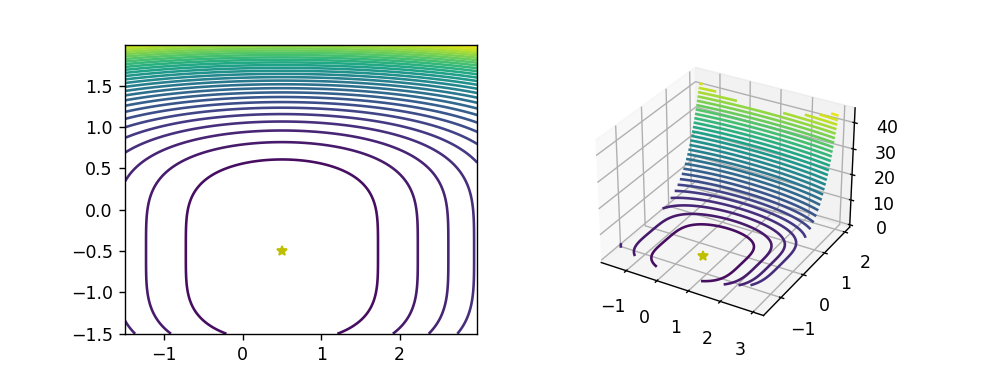

In [13]:
default_minima = np.array([0.5, -0.5])

def f_convex(x, xi=default_minima):
    x_ = x-default_minima
    return np.sum(x_**[2,4], axis=-1)


def grad_f_convex(x, xi=default_minima):
    x_ = x-default_minima
    grad = np.array([2*x_[0], 4*x_[1]**3])
    return grad


fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

plot_f(f_convex, ax1, optimum_point=default_minima)
plot_f(f_convex, ax2, optimum_point=default_minima)
fig.show()

## Solutions for the Convex Function using Previously Mentioned Methods

### GD with Fixed Step Size

In [14]:
step_size = 0.01
x0 = [2., 1.5]
epoch = 150

x, history = gradient_descent_fixed_step_size(
    x0, grad_f_convex, epoch, step_size)
print("Final x:", x)

HTML(animate_optimization(f_convex, history,
                          title="GD with Fixed Step Size", optimum_point=default_minima))

Final x: [ 0.57244403 -0.21709385]


### GD with Line Search

In [15]:
min_step_size = 0
max_step_size = 0.5
n_steps = 100
x0 = [2., 1.5]
epoch = 20

x, history = gradient_descent_line_search(
    x0, f_convex, grad_f_convex, epoch, min_step_size, max_step_size, n_steps)
print("Final x:", x)

HTML(animate_optimization(f_convex, history,
                          title="GD with Line Search", optimum_point=default_minima))

Final x: [ 0.5        -0.60443576]


### GD using Conjugate Gradients

In [16]:
min_step_size = 0
max_step_size = 0.5
n_steps = 100
x0 = np.array([2., 1.5])
epoch = 30
beta_calc = "fletcher-reeves"

x, history = gradient_descent_conjugate_gradients(
    x0, f_convex, grad_f_convex, epoch, min_step_size, max_step_size, n_steps, beta_calc)
print("Final x:", x)

print("Beta is calculated using:", beta_calc)
HTML(animate_optimization(f_convex, history,
                          title="GD using Conjugate Gradients ("+beta_calc+")", optimum_point=default_minima))

Final x: [ 0.5        -0.58677136]
Beta is calculated using: fletcher-reeves


In [17]:
min_step_size = 0
max_step_size = 0.1
n_steps = 100
x0 = np.array([2., 1.5])
epoch = 30
beta_calc = "polak-ribiere"

x, history = gradient_descent_conjugate_gradients(
    x0, f_convex, grad_f_convex, epoch, min_step_size, max_step_size, n_steps, beta_calc)
print("Final x:", x)

print("Beta is calculated using:", beta_calc)
HTML(animate_optimization(f_convex, history,
                          title="GD using Conjugate Gradients ("+beta_calc+")", optimum_point=default_minima))

Final x: [ 0.50246767 -0.68303173]
Beta is calculated using: polak-ribiere


## Gradient Descent with Momentum

In [18]:
def gradient_descent_with_momentum(x0, grad_f, epoch, step_size, alpha=0.95):
    x = np.array(x0)
    v = np.zeros(x.shape)

    history = [x.copy()]
    for i in range(epoch):
        grad_x = grad_f(x).flatten()
        v = alpha*v - (1-alpha)*step_size*grad_x
        x = x+v
        history.append(x.copy())
    return x, history


step_size = 0.075
x0 = [2., 1.5]
epoch = 150

x, history = gradient_descent_with_momentum(
    x0, grad_f_convex, epoch, step_size)
print("Final x:", x)

HTML(animate_optimization(f_convex, history,
                          title="Gradient Descent with Momentum", optimum_point=default_minima))

Final x: [ 0.53217876 -0.52998578]


## Gradient Descent with Nesterov Momentum

In [19]:
def gradient_descent_with_nesterov_momentum(x0, grad_f, epoch, step_size, alpha=0.9):
    x = np.array(x0)
    v = np.zeros(x.shape)

    history = [x.copy()]
    for i in range(epoch):
        grad_x = grad_f(x + alpha*v).flatten()  # only change is here
        v = alpha*v - (1-alpha)*step_size*grad_x
        x = x+v
        history.append(x.copy())
    return x, history


step_size = 0.075
x0 = [2., 1.5]
epoch = 150

x, history = gradient_descent_with_nesterov_momentum(
    x0, grad_f_convex, epoch, step_size)
print("Final x:", x)

HTML(animate_optimization(f_convex, history,
                          title="Gradient Descent with Nesterov Momentum", optimum_point=default_minima))

Final x: [ 0.49982626 -0.40311376]


## Gradient Descent Adam

In [20]:
def gradient_descent_adam(x0, grad_f, epoch, step_size):
    p1 = 0.9
    p2 = 0.999

    t = 0
    x = np.array(x0)
    s = np.zeros(x.shape)
    r = np.zeros(x.shape)

    history = [x.copy()]
    for i in range(epoch):
        grad_x = grad_f(x).flatten()
        t += 1

        s = p1*s + (1-p1)*grad_x
        r = p2*r + (1-p2)*grad_x*grad_x

        s_cor = s/(1-p1**t)
        r_cor = r/(1-p2**t)

        Dx = -step_size*s_cor/(np.sqrt(r)+0.000001)

        x = x+Dx

        history.append(x.copy())
    return x, history


step_size = 0.075
x0 = [2., 1.5]
epoch = 150

x, history = gradient_descent_adam(x0, grad_f_convex, epoch, step_size)
print("Final x:", x)

HTML(animate_optimization(f_convex, history,
                          title="Gradient Descent Adam", optimum_point=default_minima))

Final x: [ 0.50018282 -0.51940119]


In [21]:
def gradient_descent_adam_nesterov(x0, grad_f, epoch, step_size):
    p1 = 0.9
    p2 = 0.999

    t = 0
    x = np.array(x0)
    s = np.zeros(x.shape)
    r = np.zeros(x.shape)
    Dx = 0

    history = [x.copy()]
    for i in range(epoch):
        grad_x = grad_f(x+Dx).flatten()
        t += 1

        s = p1*s + (1-p1)*grad_x
        r = p2*r + (1-p2)*grad_x*grad_x

        s_cor = s/(1-p1**t)
        r_cor = r/(1-p2**t)

        Dx = -step_size*s_cor/(np.sqrt(r)+0.000001)

        x = x+Dx

        history.append(x.copy())
    return x, history


step_size = 0.075
x0 = [2., 1.5]
epoch = 150

x, history = gradient_descent_adam_nesterov(
    x0, grad_f_convex, epoch, step_size)
print("Final x:", x)

HTML(animate_optimization(f_convex, history,
                          title="Gradient Descent Adam with Nesterov", optimum_point=default_minima))

Final x: [ 0.50000033 -0.44115308]
